<a href="https://colab.research.google.com/github/diegopajarito/COVID19_datavis/blob/master/world/Ex_1_Covid19_country_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook aims to provide a set of basic analysis tools to help understanding how confirmed COVID-19 behave. The tools use data about confirmed cases as well as deaths and recovered cases.

This tool uses [open datasets](https://github.com/CSSEGISandData/COVID-19) provided by the [Center for Systems Science and Engineering](https://systems.jhu.edu/), Johns Hopkins University. This exercise does not pretend to substitute official reports or publications. Therefore, it should be taken as an academic exercise for non-expert audiences (i.e., neither data scientists nor epidemiologists) interested in using data analysis tools in real-world cases.

**Author**: *Diego Pajarito Grajales*

**Twitter**: [*@diegopajarito*](https://twitter.com/diegopajarito)

# General Set-up and Data Access

[CSSEGIS](https://github.com/CSSEGISandData/COVID-19) maintains the two most famous datasets for the COVID-19 crisis. These datasets are updated constantly and made available through a GitHub Repository. This tool uses Python libraries such as [Pandas](https://pandas.pydata.org/) (i.e., a library for data manipulation and analysis), [Numpy](https://numpy.org) (i.e., a library for maths and multidimensional operations), [Seaborn](https://seaborn.pydata.org) and Matplotlib to handle data collection, mathematical operations and visualisation.

*Task 1: Prepare the python environment by importing the libraries needed*

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

To access web data. the libraries need addresses. In this case, data about COVID-19 is available at the CSSEGIS GitHub Repository.

*Task 2: Set the links to access the latest data available from the [Center for Systems Science and Engineering](https://systems.jhu.edu/) at their GitHub repository*

In [0]:
jhu_link_confirmed = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
jhu_link_deaths = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

CSSEGIS data has a structure in which every day a new column is added to a table. To get data for a single country, we need functions to filter and set a structure compatible with plotting libraries. Using python functions, we can use filters, labels and time formats to prepare the data for visualisation.

Task 3: Set a function that 
- Reads the published dataset using the links above.
- Filters data by country.
- Creates a dataframe (i.e., table-like structure used in python) with confirmed cases and reported date.
- Sets the format needed for handling dates. 

Note: The use of functions makes it easier to call operations without re-writing long pieces of code (Also known as re-use).

In [0]:
def get_country_confirmed(country):
    jhu_confirmed = pd.read_csv(jhu_link_confirmed)
    country_data = jhu_confirmed[jhu_confirmed['Country/Region'] == country]
    if len(country_data) == 1:
        country_data = country_data.iloc[:, 4:]
        country_data = country_data.T
        country_data = country_data.reset_index()
        country_data.columns = ['date', 'confirmed_cases']
        country_data['date'] = pd.to_datetime(country_data['date'])
    return country_data

# Data visualisation for country-level trends
## *Creating a cumulative line plot for the number of confirmed cases in a single country*


Task 1: Set parameters for filtering out the data for a specific country

*Note: By changing this parameters (i.e., the value for the 'country' variable), you can plot confirmed cases for different countries in Task 2.*

In [0]:
country = 'Italy'
title = 'COVID-19 Cases in %s' % country

After getting a formatted dataset, additional operations are needed for obtaining meaningful labels in the plot.

Task 2: Format the dataset by estimating the date in which Case-1 was reported and the correspondent day for confirmed cases.
- Case-1 date is the day in which the country registered the first confirmed case of COVID-19
- Every day after Case-1 is labelled using a sequence. This serves for comparison between countries.

*Note: The data for some countries (e.g., China, France, United States, The Netherlands, Australia, United Kingdom, among others) report data per region causing errors in the following piece of code. In the following exercises, this issue will be addressed by grouping data per country.*

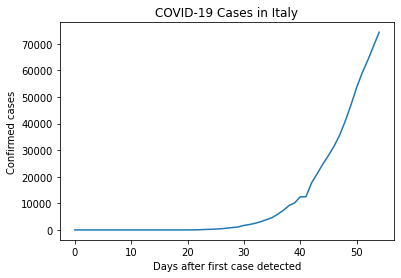

In [59]:
data = get_country_confirmed(country)
data = data[data['confirmed_cases'] > 0]
initial_day = data['date'].min()
data['day'] = data['date'] - initial_day
data['day'] = data['day']/np.timedelta64(1, 'D')
ax = sns.lineplot('day', 'confirmed_cases', data=data)
ax.set(xlabel='Days after first case detected', ylabel='Confirmed cases', title=title)
path = 'cases_%s' % country
plt.savefig(path)

Note: Plots are automatically saved as png files (see the last two lines of code) in the same folder of this notebook. When using Google Colab, you can check the files by clicking the "Files" icon located at the left menu of this page. 

***Folder "content/"***

## *Adding death cases to the cumulative line plot for a single country*

CSSS data also includes confirmed deaths produced by COVID-19. A similar process is followed to plot both confirmed and death cases in a single plot.

Task 1: Set the function 

In [0]:
def get_country_deaths(country):
    jhu_deaths = pd.read_csv(jhu_link_deaths)
    country_data = jhu_deaths[jhu_deaths['Country/Region'] == country]
    if len(country_data) == 1:
        country_data = country_data.iloc[:, 4:]
        country_data = country_data.T
        country_data = country_data.reset_index()
        country_data.columns = ['date', 'deaths']
        country_data['date'] = pd.to_datetime(country_data['date'])
    return country_data

Task 2: Set the parameters needed for filtering the data set for a specific country as in the section above. 

*Note: By changing these parameters (i.e., the value for the 'country' variable), you can plot confirmed cases for different countries in Tasks 3 and 4.*

In [0]:
country = 'Italy'
title = 'COVID-19 Cases in %s' % country
yaxis_label = ''
xaxis_label = 'Days after first case detected'

After getting a formatted dataset, additional operations are needed for obtaining meaningful labels in the plot.

Task 2: Format the dataset by estimating the date in which Case-1 was reported and the correspondent day for confirmed and death cases.

- Case-1 date is the day in which the country registered the first confirmed case of COVID-19
- Every day after Case-1 is labelled using a sequence. This serves for comparison between countries.
- Now there are two datasets (i.e., confirmed and death cases), so the format task is made for the two of them.

Note: The data for some countries (e.g., China, France, United States, The Netherlands, Australia, United Kingdom, among others) report data per region causing errors in the following piece of code. In the following exercises, this issue will be addressed by grouping data per country.

In [0]:
# Data format for confirmed cases
data = get_country_confirmed(country)
data = data[data['confirmed_cases'] > 0]
initial_day = data['date'].min()
data['day'] = data['date'] - initial_day
data['day'] = data['day']/np.timedelta64(1, 'D')

# Data format for death cases
data_deaths = get_country_deaths(country)
data_deaths = data_deaths[data_deaths['deaths'] > 0]
data_deaths['day'] = data_deaths['date'] - initial_day
data_deaths['day'] = data_deaths['day']/np.timedelta64(1, 'D')

Once the two datasets are formatted, each data set generates a line.

Task 3: Create two line plots and set title and labels

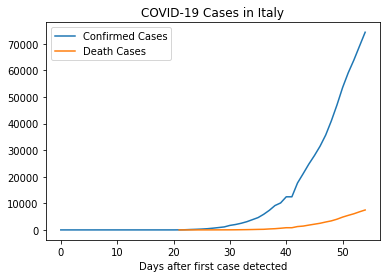

In [63]:
ax = sns.lineplot('day', 'confirmed_cases', data=data, label='Confirmed Cases')
ax1 = sns.lineplot('day', 'deaths', data=data_deaths, label='Death Cases')
plt.title(title)
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
path = 'cases_deaths_%s' % country
plt.savefig(path)

Note: Plots are automatically saved as png files (see the last two lines of code) in the same folder of this notebook. When using Google Colab, you can check the files by clicking the "Files" icon located at the left menu of this page. 

***Folder "content/"***

# Final thoughts

This exercise helped to i) access a public data set for COVID-19 cases and ii) plot trends for a specific country. Find advanced tasks in the following exercises.

This notebook is part of Diego's project to visualise COVID-19 data. If you want to get access to the source code or additional notebooks, please go to the [GitHub Repository](https://github.com/diegopajarito/COVID19_datavis) or simply contact [Diego Pajarito G. in Twitter](https://twitter.com/diegopajarito)